### DSCI100 Group 006-35 W2 Final Project

Younghoon Kim 11371317 <br>
Kentaro Barnes 49524861 <br>
Sean Liou 86967916 <br>
Matthew Pabustan 48718266 <br>

## How does player experience level and age influence the total number of hours played?

## Introduction

Video games are a valuable source of data for studying human behavior and online interaction. At the University of British Columbia, a research group led by Professor Frank Wood has created a Minecraft-based research server designed to collect such data. Here, players' actions are continuously logged as they explore the game. That said, managing the server presents several logistical challenges. Namely, the research team must ensure that they have enough hardware and software resources to handle peak player loads and must also prioritize the recruitment of participants who are likely to contribute meaningful amounts of data.

In this project, we investigate the relationship between player experience level, age, and the total number of hours played. Specifically, we aim to answer the question:
**How does player experience level and age influence the total number of hours played?** We believe that understanding this relationship can help the research team better predict which players are likely to engage deeply with the server over time, enabling them to recruit more effectively and plan resources accordingly.

To explore this question, we use the players.csv dataset which contains information about information about a variety of player demographics as well as each player's experience level, engagement with the server, and subscription status. We have also included the sessions.csv dataset, which contains informataion about individual players' sessions on the server, to support further analysis.

## Datasets
### players.csv overview
A list of 196 unique participants who played on the minecraft server hosted for a scientific study with the following information for each player:
##### experience
- Originally a character `<chr>` variable, converted to factor `<fct>` containing one of the following:
    - Beginner (35)
    - Regular (36)
    - Amateur (63)  
    - Veteran (48)
    - Pro (14)
- Represents a player's self-reported experience in the game.
##### subscribe
- a logical `<lgl>` variable where TRUE indicates that the player is subscribed to the game-related newsletter, and FALSE indicates that the player has not
    - 144 players reported TRUE, 52 reported FALSE.
##### hashedEmail
- a string of characters `<chr>` that acts as a unique id to identify players in sessions.csv
##### played_hours
- A double `<dbl>` variable, indicating the number of hours a participant has spent playing on the server.
    - On average, each player spends a total of 5.85 hours.
##### name
- A character `<chr`> variable containing the player's real (first) name.
##### gender
- Originally a character `<chr>` variable, converted to factor `<fct>` containing one of the following:
    - Male (124)
    - Female (37)
    - Non-binary (15)
    - Prefer not to say (11)
    - Agender (2)
    - Two-Spirited (6)
    - Other (1)
- Represents a player's gender
##### Age
- A double `<dbl>` variable, indicating the age of the player in years.
    - On average, the players are 20.52 years old.
    - Two rows/players contain missing Age data, and thus is removed from the list.

### sessions.csv overview
A catalogue of all 1535 instances where a player logs into the server with the following information for each instance.
##### hashedEmail
- a string of characters `<chr>` indicating which unique player that logged on, allowing us to track session information along with personal information in players.csv.
##### start_time
- Originally a string of characters `<chr>` indicating the time (Day/Month/Year Hour:Minute) when the player logs ON
    - Converted to a date-time `<ddtm>` variable for ease of use.
##### end_time
- Originally a string of characters `<chr>` indicating the time (Day/Month/Year Hour:Minute) when the player logs OFF
    - Converted to a date-time `<ddtm>` variable for ease of use.
##### original_start_time
- A double `<dbl>` variable that represents the time a player logs ON, in number of milliseconds since 1970.
    - Not reported to high enough precision for comparison, and thus is removed.
##### original_end_time
- A double `<dbl>` variable that represents the time a player logs OFF, in number of milliseconds since 1970.
    - Not reported to high enough precision for comparison, and thus is removed.



## Methods

placeholder----------

In [2]:
# Load necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

set.seed(69420)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
# Reading the data

# URL to the csv files stored on github
players_url <- "https://raw.githubusercontent.com/KentoBaguetti/DSCI100-GroupProjcect/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/KentoBaguetti/DSCI100-GroupProjcect/refs/heads/main/sessions.csv"

# read the csv data into dataframes
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [19]:
# Tidy the data
tidy_players <- players |>
  mutate(
    experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"), ordered = TRUE), # 
    experience_numeric = as.numeric(experience)
  ) |>
    select(played_hours, experience_numeric, Age) |>
    filter(played_hours < 60) |>
    mutate(experience_numeric = as.integer(experience_numeric))

tidy_players

played_hours,experience_numeric,Age
<dbl>,<int>,<dbl>
30.3,5,9
3.8,4,17
0.0,4,17
⋮,⋮,⋮
0.0,2,17
2.3,2,17
0.2,5,NA


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


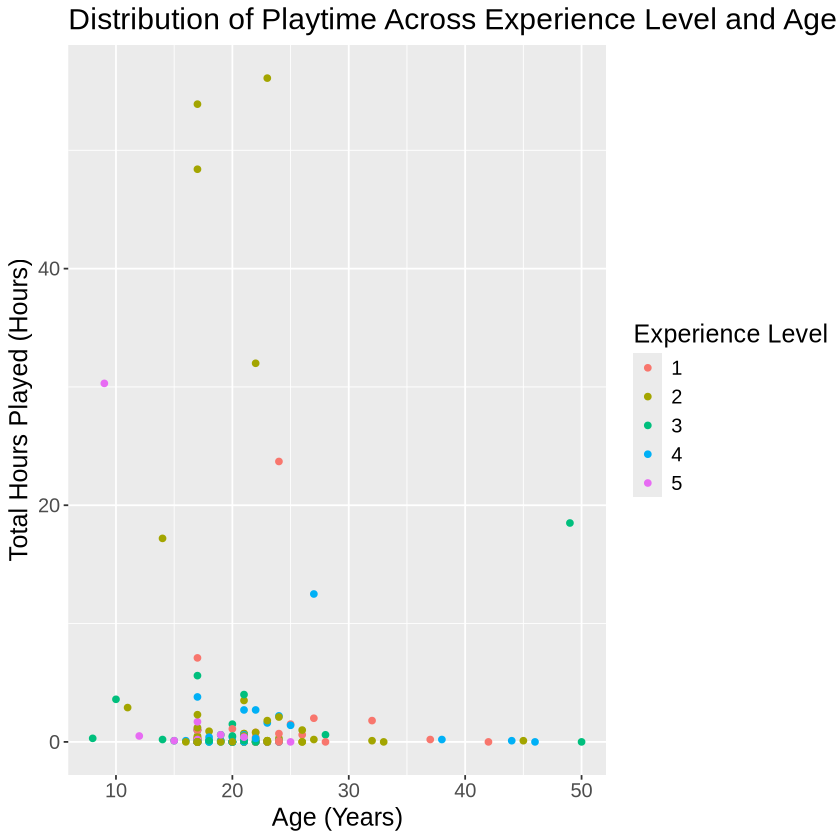

In [20]:
# Age vs Play time
prepredict_plot <- tidy_players |>
    ggplot(aes(x=Age, y=played_hours, color = as.factor(experience_numeric))) +
    geom_point() +
    labs(title = "Distribution of Playtime Across Experience Level and Age",
         x = "Age (Years)",
         y = "Total Hours Played (Hours)",
         color = "Experience Level") +
    theme(text=element_text(size=15))

prepredict_plot

In [6]:
# use knn regression as a linear relationship is not present within the data

players_split <- initial_split(tidy_players, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

knn_recipe <- recipe(played_hours ~ Age, data = tidy_players) |>
    step_impute_mean(all_numeric_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

players_wf <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

players_wf


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_impute_mean()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,6.514348,5,2.155715,Preprocessor1_Model01
2,rmse,standard,6.726841,5,1.925469,Preprocessor1_Model02
3,rmse,standard,6.755797,5,2.227401,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,rmse,standard,6.489739,5,1.886480,Preprocessor1_Model28
29,rmse,standard,6.461944,5,1.867799,Preprocessor1_Model29
30,rmse,standard,6.465747,5,1.867027,Preprocessor1_Model30


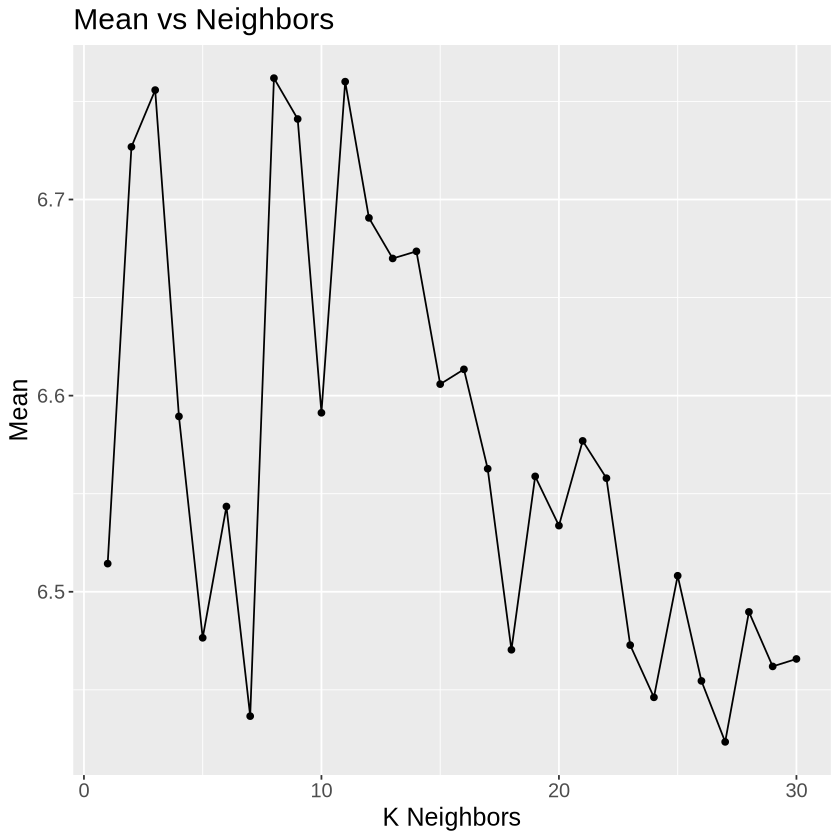

In [26]:
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

players_results <- players_wf |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

players_results

rmse_plot <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    ggtitle("Mean vs Neighbors") + 
    xlab("K Neighbors") +
    ylab("Mean") +
    theme(text=element_text(size=15))

rmse_plot

In [8]:
min_neighbor <- players_results |>
    filter(mean == min(mean))

min_neighbor

# lowest rmse is when k = 27

k_min <- min_neighbor |>
    pull(neighbors)

k_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
27,rmse,standard,6.423458,5,1.934158,Preprocessor1_Model27


[1] 27

In [22]:
players_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")

players_final_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(players_final_spec) |>
    fit(data = players_train)

players_summary <- players_final_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse")

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8.283365


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


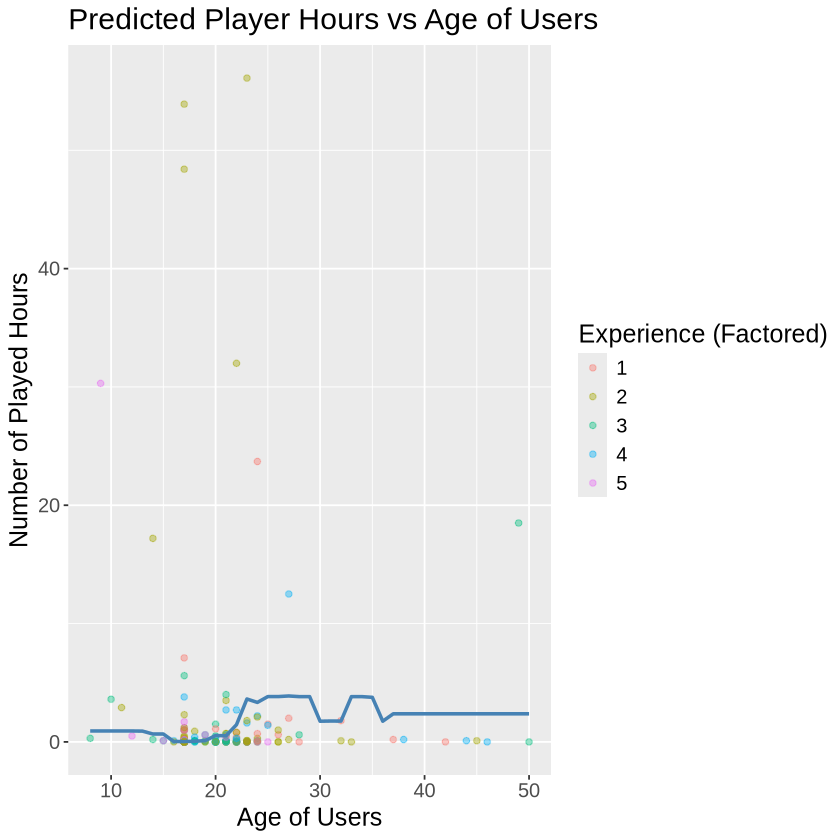

In [24]:
players_prediction_grid <- expand_grid(
  Age = seq(
    from = min(tidy_players$Age, na.rm = TRUE),
    to   = max(tidy_players$Age, na.rm = TRUE),
    by = 1
  ),
  experience_numeric = 1:5 
)

players_pred <- players_final_fit |>
    predict(players_prediction_grid)|>
    bind_cols(players_prediction_grid)

players_plot_final <- tidy_players |>
    ggplot(aes(x = Age, y = played_hours, color = as.factor(experience_numeric))) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_pred, mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
    xlab("Age of Users") +
    ylab("Number of Played Hours") +
    ggtitle("Predicted Player Hours vs Age of Users") +
    labs(color = "Experience (Factored)") +
    theme(text=element_text(size=15))

players_plot_final

Warning message:
“5 samples were requested but there were 9 rows in the data. 4 will be used.”


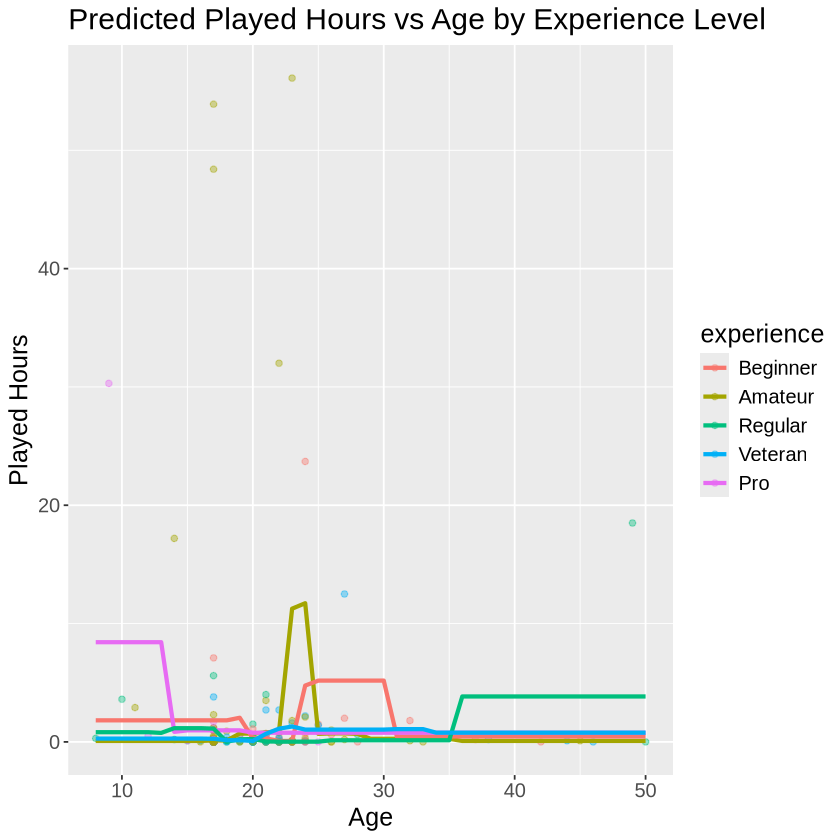

In [15]:
tidy_players <- players |>
  mutate(
    experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))
  ) |>
  select(played_hours, experience, Age) |>
  filter(played_hours < 60, !is.na(Age))


age_grid <- tibble(Age = seq(min(tidy_players$Age), max(tidy_players$Age), by = 1))


predict_per_experience <- function(experience_level) {
  
  data_exp <- tidy_players |> filter(experience == experience_level)
  
  set.seed(123)
  data_split <- initial_split(data_exp, prop = 0.75)
  data_train <- training(data_split)
  
  
  rec <- recipe(played_hours ~ Age, data = data_train) |>
    step_impute_mean(all_predictors()) |>
    step_normalize(all_predictors())
  
  spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>  # Adjust k as needed
    set_engine("kknn") |>
    set_mode("regression")
  
  wf <- workflow() |>
    add_recipe(rec) |>
    add_model(spec)
  
  
  fit <- wf |> fit(data = data_train)
  
  
  preds <- fit |> predict(age_grid) |>
    bind_cols(age_grid) |>
    mutate(experience = experience_level)
  
  return(preds)
}


experience_levels <- levels(tidy_players$experience)


all_preds <- map_dfr(experience_levels, predict_per_experience)


tidy_players |> 
  ggplot(aes(x = Age, y = played_hours, color = experience)) +
  geom_point(alpha = 0.4) +
  geom_line(data = all_preds, aes(x = Age, y = .pred, color = experience), size = 1.2) +
  labs(title = "Predicted Played Hours vs Age by Experience Level",
       x = "Age", y = "Played Hours") +
    theme(text=element_text(size=15))

## Discussion

### Our results


### Expected findings vs results
placeholder-----------

### Significance
placeholder-----------

### What future questions could this lead to?
placeholder-----------